In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
df=pd.read_csv("Covid Dataset.csv")

In [7]:
df=df.fillna(0)
df.shape
df=df.replace(["Yes","No"],[1,0])

In [8]:
x = df[['Breathing Problem','Fever','Dry Cough','Sore throat','Running Nose','Asthma','Chronic Lung Disease','Headache','Heart Disease','Hyper Tension','Fatigue ','Gastrointestinal ','Abroad travel','Contact with COVID Patient','Attended Large Gathering','Visited Public Exposed Places','Family working in Public Exposed Places','Wearing Masks','Sanitization from Market']]
y=df['COVID-19']
X= preprocessing.StandardScaler().fit(x).transform(x)
X

array([[ 0.70788768,  0.52125432,  0.51153402, ...,  1.184187  ,
         0.        ,  0.        ],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ],
       ...,
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)   #change in random state 
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))

[1 0 1 ... 1 1 1]


In [15]:
print("TRAIN SCORE:",knn.score(X_train, y_train))
print("TEST SCORE:",knn.score(X_test, y_test))

TRAIN SCORE: 0.9806763285024155
TEST SCORE: 0.9760809567617296


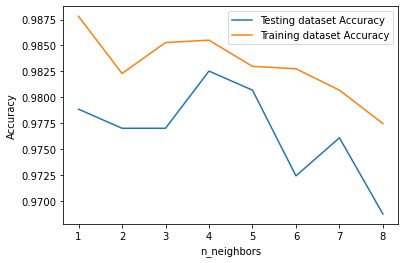

In [11]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()